In [8]:
import pandas as pd

df = pd.read_csv("senegal_raw.csv", sep=';')  # or delimiter=';'

# Preview the data
df.head()



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9488\4255381260.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("senegal_raw.csv", sep=';')  # or delimiter=';'


,time,dhi_rsi,ghi_sil,ghi_pyr,air_temperature,relative_humidity,barometric_pressure,precipitation,wind_speed,wind_speed_calc,wind_from_direction,sensor_cleaning,comments
0,2016-09-02 00:01,0.0,0.0,0.0,26.43,96.6,1013,0.0,0.914,1.0855,249.1,0,NaN
1,2016-09-02 00:02,0.0,0.0,0.0,26.42,96.5,1013,0.0,1.034,1.2281,246.4,0,NaN
2,2016-09-02 00:03,0.0,0.0,0.0,26.40,96.4,1013,0.0,1.154,1.3706,251.0,0,NaN
3,2016-09-02 00:04,0.0,0.0,0.0,26.39,96.3,1013,0.0,1.007,1.1960,247.7,0,NaN
4,2016-09-02 00:05,0.0,0.0,0.0,26.40,96.4,1014,0.0,0.807,0.9585,249.6,0,NaN


In [9]:
df.describe()

,dhi_rsi,ghi_sil,ghi_pyr,air_temperature,relative_humidity,barometric_pressure,precipitation,wind_speed,wind_speed_calc,wind_from_direction,sensor_cleaning
count,566251.000000,567360.000000,567360.000000,567360.000000,567360.000000,567360.000000,567360.000000,567360.000000,567360.000000,567360.000000,567360.000000
mean,120.658133,238.689825,250.078433,27.842573,57.231029,1010.981844,0.001188,2.515818,2.987970,216.886668,0.000381
std,158.524355,323.504123,337.220745,5.262907,29.204322,2.082569,0.029663,1.438552,1.708529,111.280401,0.019508
min,0.000000,-0.068000,-0.213000,13.330000,3.623000,998.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,24.320000,29.700000,1010.000000,0.000000,1.460000,1.734000,159.300000,0.000000
50%,3.021000,2.773000,4.510000,27.060000,60.560000,1011.000000,0.000000,2.354000,2.795800,248.400000,0.000000
75%,231.100000,472.725000,499.400000,31.600000,83.600000,1012.000000,0.000000,3.460000,4.109300,306.400000,0.000000
max,850.000000,1451.000000,1402.000000,44.230000,100.000000,1018.000000,3.200000,15.810000,18.777100,360.000000,1.000000


In [10]:
df.isna().sum()


time                        0
dhi_rsi                  1109
ghi_sil                     0
ghi_pyr                     0
air_temperature             0
relative_humidity           0
barometric_pressure         0
precipitation               0
wind_speed                  0
wind_speed_calc             0
wind_from_direction         0
sensor_cleaning             0
comments               566251
dtype: int64

In [11]:
null_percent = df.isna().mean() * 100
columns_with_nulls_over_5 = null_percent[null_percent > 5]
print(columns_with_nulls_over_5)

comments    99.804533
dtype: float64


In [12]:
import numpy as np
from scipy.stats import zscore

In [13]:
cols_to_check = ['dhi_rsi', 'ghi_sil', 'ghi_pyr', 'wind_speed', 'wind_speed_calc']

# 1. Detect missing values
missing_counts = df[cols_to_check].isna().sum()
print("Missing values in key columns:\n", missing_counts)

# 2. Compute Z-scores for outlier detection
z_scores = df[cols_to_check].apply(zscore, nan_policy='omit')

# Flag rows where |Z| > 3 in any of these columns
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Number of outlier rows detected: {outliers.sum()}")

# 3. Display full outlier rows without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

outlier_rows = df[outliers]
print(outlier_rows)

# 4. Handle missing values: Impute median in key columns
for col in cols_to_check:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print("Missing values after imputation:\n", df[cols_to_check].isna().sum())

Missing values in key columns:
 dhi_rsi            1109
ghi_sil               0
ghi_pyr               0
wind_speed            0
wind_speed_calc       0
dtype: int64
Number of outlier rows detected: 5237
                    time  dhi_rsi   ghi_sil   ghi_pyr  air_temperature  \
685     2016-09-02 11:26  604.500   641.200   623.600            28.85   
702     2016-09-02 11:43  619.100   886.000   855.000            28.79   
756     2016-09-02 12:37  605.600  1041.000   993.000            29.03   
757     2016-09-02 12:38  586.500  1234.000  1191.000            29.14   
798     2016-09-02 13:19  607.600   747.000   725.300            29.58   
799     2016-09-02 13:20  658.300   956.000   916.000            29.75   
800     2016-09-02 13:21  680.100   929.000   884.000            29.97   
801     2016-09-02 13:22  729.900  1106.000  1056.000            30.01   
802     2016-09-02 13:23  731.000  1131.000  1086.000            30.01   
803     2016-09-02 13:24  700.900   882.000   852.000    

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9488\4246973990.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9488\4246973990.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [14]:
import os

# Make sure the data/ directory exists
os.makedirs("data", exist_ok=True)

# Export senegal_eda DataFrame to CSV (no index column)
df.to_csv("data/senegal_clean.csv", index=False)


In [15]:
import matplotlib.pyplot as plt

# Ensure datetime format
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)  # Set time as index for time series plots


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9488\3077914359.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


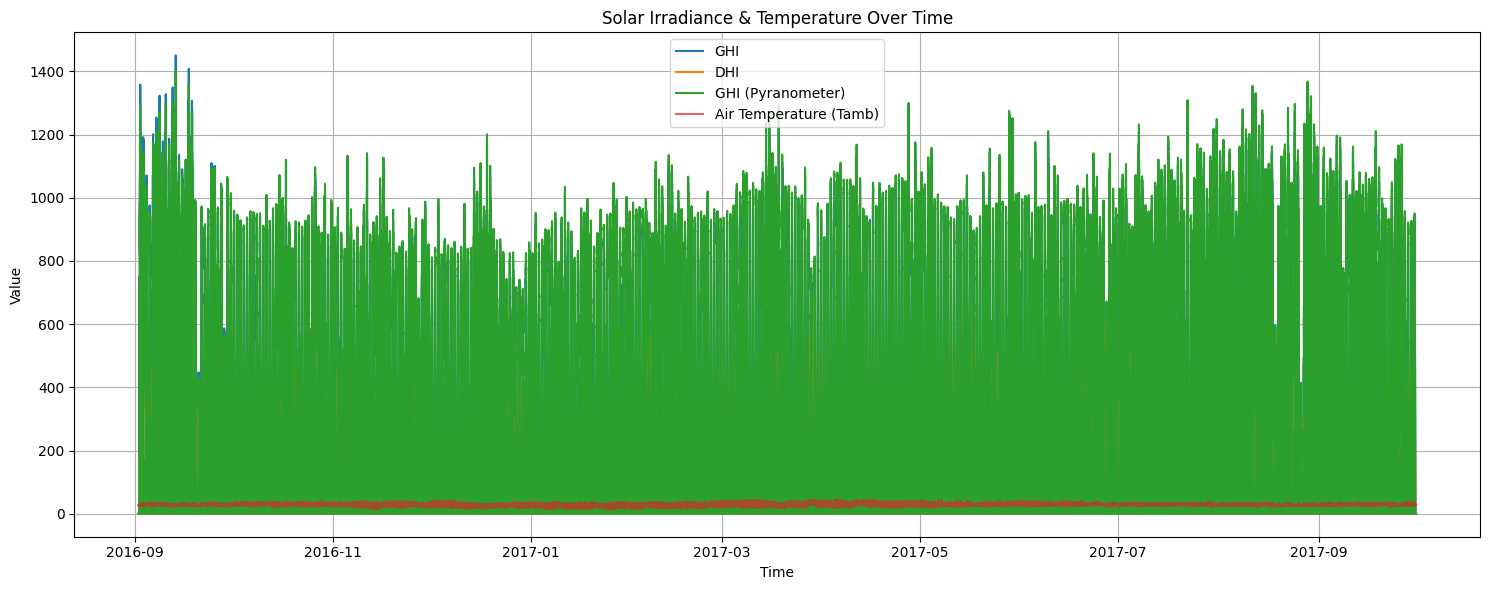

In [16]:
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['ghi_sil'], label='GHI')
plt.plot(df.index, df['dhi_rsi'], label='DHI')
plt.plot(df.index, df['ghi_pyr'], label='GHI (Pyranometer)')
plt.plot(df.index, df['air_temperature'], label='Air Temperature (Tamb)', alpha=0.7)

plt.title('Solar Irradiance & Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


                    dhi_rsi     ghi_sil
sensor_cleaning                        
0                120.393401  238.641332
1                211.776870  366.015343


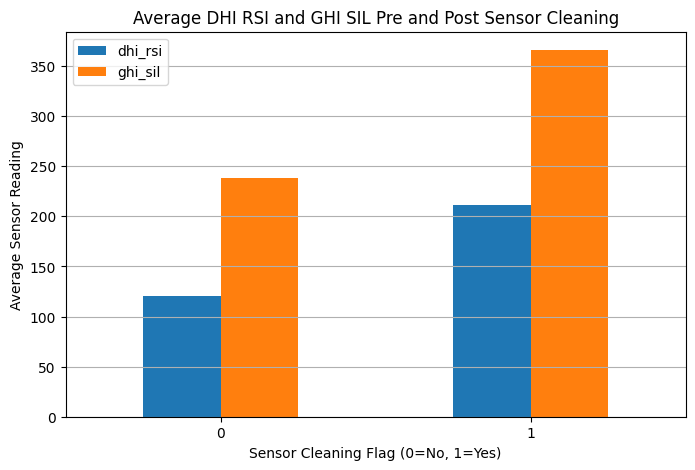

In [17]:
import matplotlib.pyplot as plt

# Choose columns to analyze impact of cleaning
cols_to_analyze = ['dhi_rsi', 'ghi_sil']

# Group by cleaning flag and compute mean of selected columns
grouped = df.groupby('sensor_cleaning')[cols_to_analyze].mean()

print(grouped)

# Plotting
grouped.plot(kind='bar', figsize=(8,5))

plt.title('Average DHI RSI and GHI SIL Pre and Post Sensor Cleaning')
plt.xlabel('Sensor Cleaning Flag (0=No, 1=Yes)')
plt.ylabel('Average Sensor Reading')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


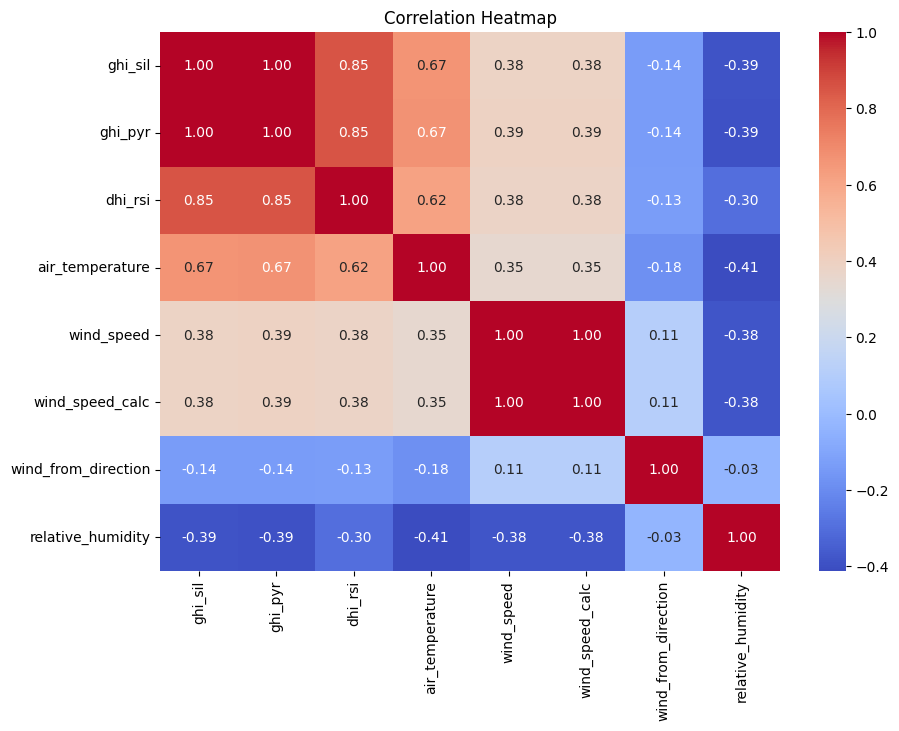

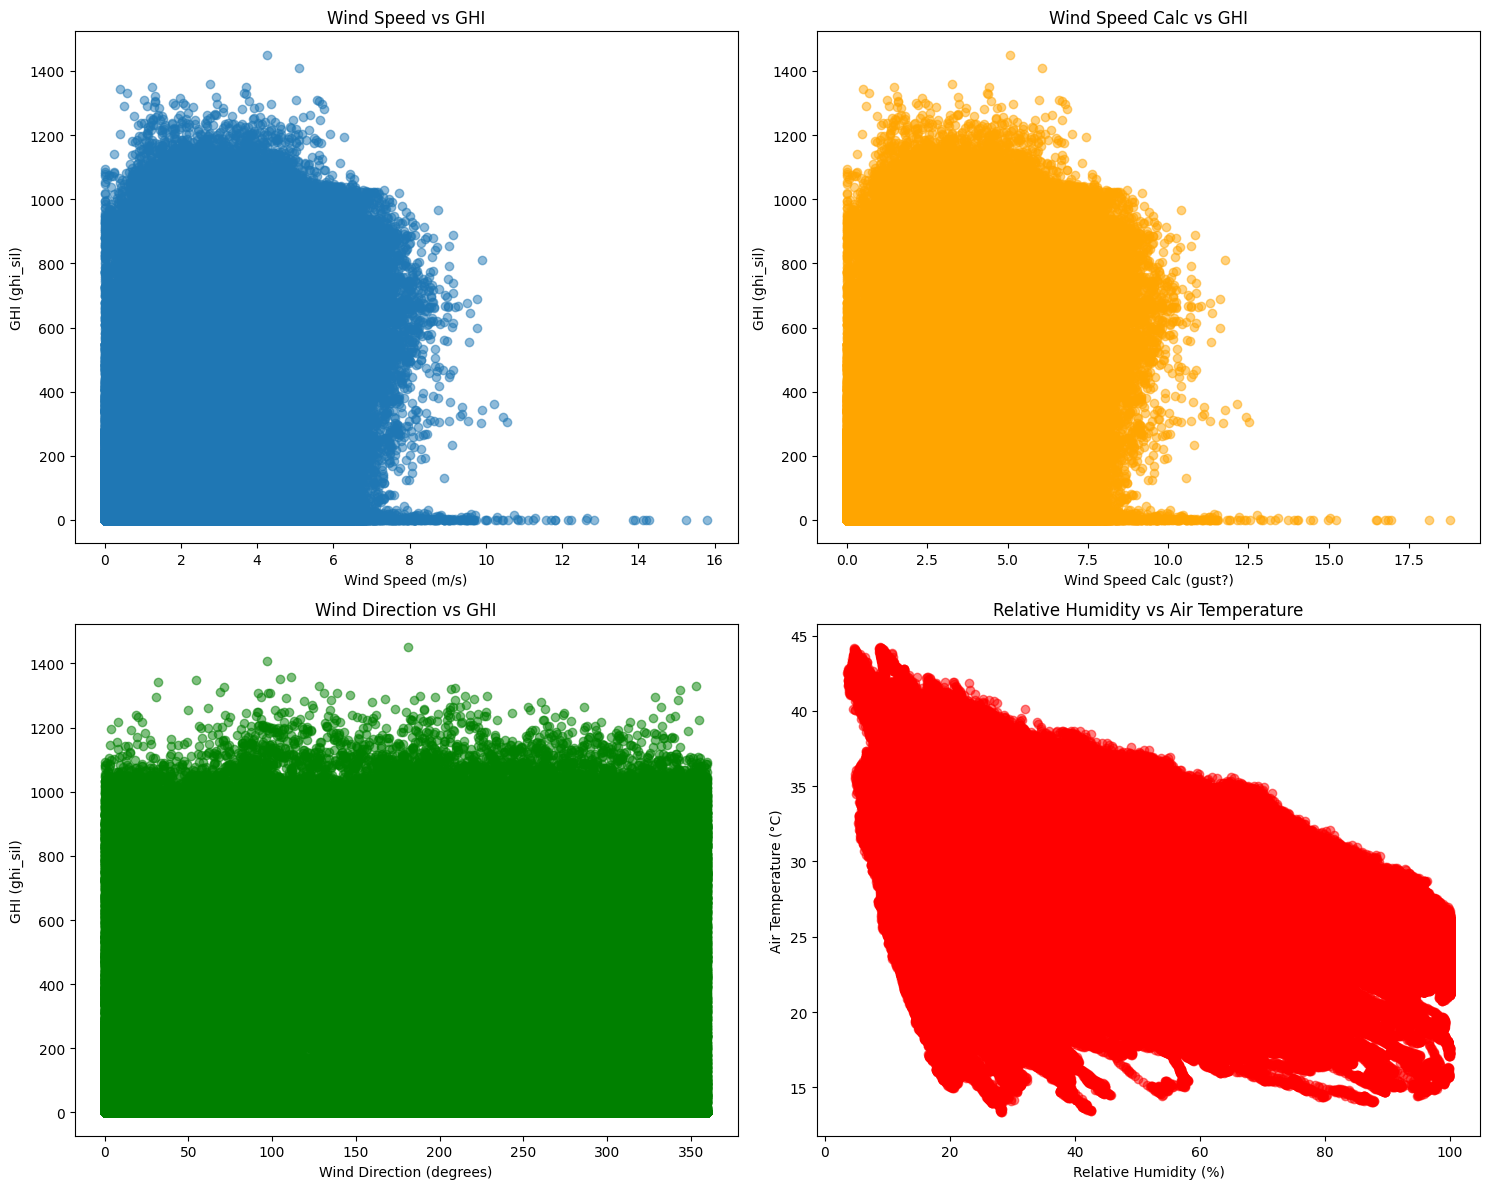

In [18]:
import seaborn as sns

# Select columns for correlation heatmap
corr_cols = ['ghi_sil', 'ghi_pyr', 'dhi_rsi', 'air_temperature', 'wind_speed', 'wind_speed_calc', 'wind_from_direction', 'relative_humidity']

# Compute correlation matrix
corr = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
plt.figure(figsize=(15, 12))

# WS vs GHI (use ghi_sil here)
plt.subplot(2, 2, 1)
plt.scatter(df['wind_speed'], df['ghi_sil'], alpha=0.5)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (ghi_sil)')
plt.title('Wind Speed vs GHI')

# WSgust vs GHI (use wind_speed_calc here)
plt.subplot(2, 2, 2)
plt.scatter(df['wind_speed_calc'], df['ghi_sil'], alpha=0.5, color='orange')
plt.xlabel('Wind Speed Calc (gust?)')
plt.ylabel('GHI (ghi_sil)')
plt.title('Wind Speed Calc vs GHI')

# WD vs GHI (wind_from_direction)
plt.subplot(2, 2, 3)
plt.scatter(df['wind_from_direction'], df['ghi_sil'], alpha=0.5, color='green')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('GHI (ghi_sil)')
plt.title('Wind Direction vs GHI')

# RH vs Tamb (relative_humidity vs air_temperature)
plt.subplot(2, 2, 4)
plt.scatter(df['relative_humidity'], df['air_temperature'], alpha=0.5, color='red')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Air Temperature (°C)')
plt.title('Relative Humidity vs Air Temperature')

plt.tight_layout()
plt.show()